In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv("Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [46]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [47]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [48]:
#Categorical and numerical values
categorical = df.select_dtypes(include=['object']).columns
numerical = df.select_dtypes(exclude=['object']).columns

print("Categorical columns:", list(categorical))
print("Numerical columns:", list(numerical))

Categorical columns: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
Numerical columns: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']


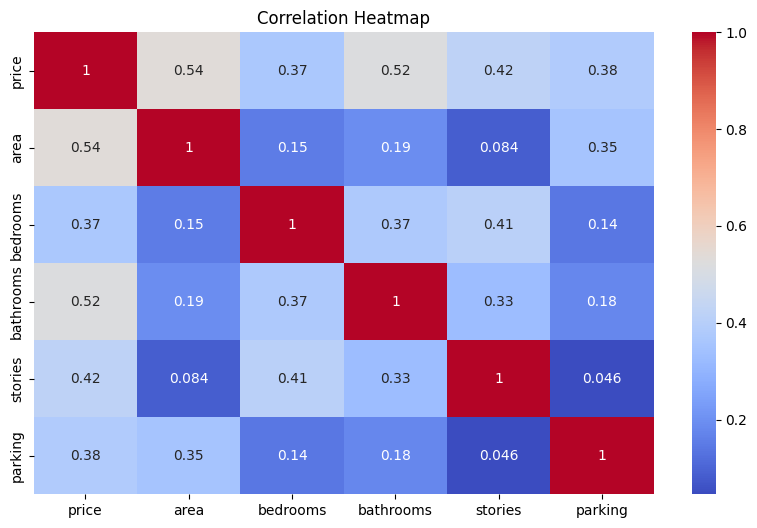

In [49]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numerical].corr(), annot = True, cmap = "coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [50]:
#Data cleaning
df = df.drop_duplicates() #drop duplicates

In [51]:
#Handling missing numeric data if any
df = df.fillna(df.median(numeric_only = True))

In [52]:
# Convert categorical columns to numeric using Label Encoding / One-Hot
df = pd.get_dummies(df, drop_first=True)

In [53]:
print("After cleaning shape:", df.shape)
df.head()

After cleaning shape: (545, 14)


,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


In [54]:
X = df.drop(columns = ["price"])
y = df["price"]

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

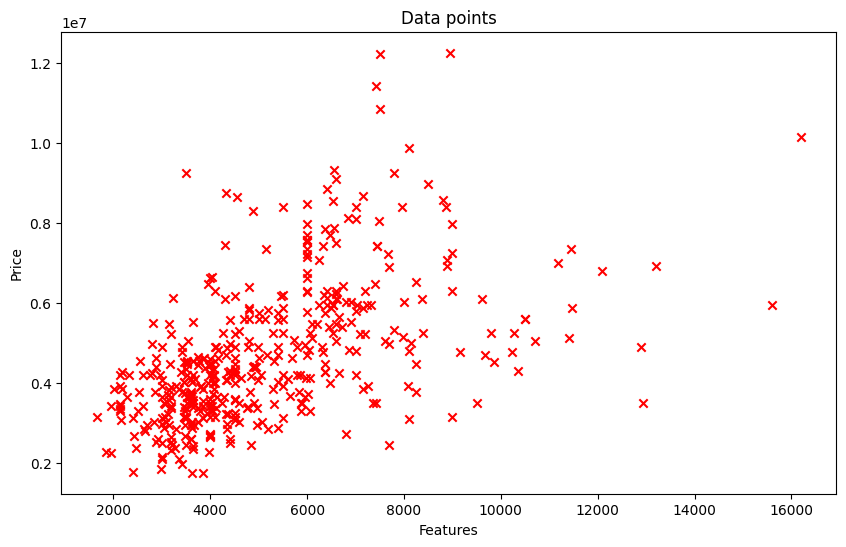

In [57]:
plt.figure(figsize=(10,6))
plt.scatter(X_train.iloc[:,0], y_train, marker = 'x', c = 'r')
plt.title("Data points")
plt.xlabel("Features")
plt.ylabel("Price")
plt.show()

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [60]:
y_pred = lr.predict(X_test)

In [61]:
#Metrics Evaluation
from sklearn.metrics import mean_squared_error, r2_score
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 1754318687330.6643
R²: 0.6529242642153184


In [67]:
# ---- User Input Section ----
print("\n🏡 Enter the house details:")

area = float(input("Area (in sq ft): "))
bedrooms = int(input("Number of bedrooms: "))
bathrooms = int(input("Number of bathrooms: "))
stories = int(input("Number of stories: "))

mainroad = input("Is it on the main road? (yes/no): ").strip().lower()
guestroom = input("Is there a guest room? (yes/no): ").strip().lower()
basement = input("Is there a basement? (yes/no): ").strip().lower()
hotwaterheating = input("Hot water heating available? (yes/no): ").strip().lower()
airconditioning = input("Air conditioning available? (yes/no): ").strip().lower()
parking = int(input("Number of parking spaces: "))
prefarea = input("Preferred area? (yes/no): ").strip().lower()
furnishingstatus = input("Furnishing status (furnished/semifurnished/unfurnished): ").strip().lower()

# Prepare user input dictionary (must match dummy column names)
user_dict = {
    'area': area,
    'bedrooms': bedrooms,
    'bathrooms': bathrooms,
    'stories': stories,
    'parking': parking,
    'mainroad_yes': 1 if mainroad == 'yes' else 0,
    'guestroom_yes': 1 if guestroom == 'yes' else 0,
    'basement_yes': 1 if basement == 'yes' else 0,
    'hotwaterheating_yes': 1 if hotwaterheating == 'yes' else 0,
    'airconditioning_yes': 1 if airconditioning == 'yes' else 0,
    'prefarea_yes': 1 if prefarea == 'yes' else 0,
    'furnishingstatus_semi-furnished': 1 if furnishingstatus == 'semifurnished' else 0,
    'furnishingstatus_unfurnished': 1 if furnishingstatus == 'unfurnished' else 0
}

# Convert to DataFrame
user_input = pd.DataFrame([user_dict])

# Match model columns (in case dummy columns differ)
missing_cols = set(X.columns) - set(user_input.columns)
for col in missing_cols:
    user_input[col] = 0
user_input = user_input[X.columns]

# Predict price
predicted_price = lr.predict(user_input)[0]

# Evaluate accuracy
y_pred = lr.predict(X_test)
accuracy = r2_score(y_test, y_pred) * 100

print("\n✅ House Details Entered:")
print(user_input)
print(f"\n💰 Predicted Price: ₹{predicted_price:,.2f}")
print(f"🎯 Model Accuracy (R² Score): {accuracy:.2f}%")


🏡 Enter the house details:


Area (in sq ft):  4200
Number of bedrooms:  2
Number of bathrooms:  2
Number of stories:  2
Is it on the main road? (yes/no):  yes
Is there a guest room? (yes/no):  no
Is there a basement? (yes/no):  no
Hot water heating available? (yes/no):  yes
Air conditioning available? (yes/no):  no
Number of parking spaces:  2
Preferred area? (yes/no):  yes
Furnishing status (furnished/semifurnished/unfurnished):  semifurnished



✅ House Details Entered:
     area  bedrooms  bathrooms  stories  parking  mainroad_yes  guestroom_yes  \
0  4200.0         2          2        2        2             1              0   

   basement_yes  hotwaterheating_yes  airconditioning_yes  prefarea_yes  \
0             0                    1                    0             1   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0                                1                             0  

💰 Predicted Price: ₹6,413,763.91
🎯 Model Accuracy (R² Score): 65.29%
